In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import gapminder

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño

 1) Implementar una función que calcule la pendiente y la ordenada al origen de la recta de
 regresión lineal con las fórmulas vistas en clase

La función debe tomar como argumentos a x e y, que son pandas.Series o numpy.array, y devolver los valores de 0 y 1.


Sugerencia: recordar que dado un pandas Series se utiliza .mean() para calcular su
promedio y recordar el uso de np.sum

y = mx + b
m = (y - b) / x
b = y - mx
((y - beta_0) / x)

1.a)

In [2]:
def coefs_rl(x, y) -> (float, float):

    xMedio = x.mean()
    yMedio = y.mean()

    beta_1 = np.sum ((x - xMedio) * (y - yMedio)) / np.sum ((x - xMedio)**2)

    beta_0 = yMedio - beta_1 * xMedio
    
    return beta_0, beta_1


1.b)

In [3]:
gapdata = gapminder._load_gapminder()
datosArgentina = gapdata[gapdata['country'] == 'Argentina']
print(coefs_rl(datosArgentina['year'], datosArgentina['lifeExp']))

modelo = linear_model.LinearRegression()
modelo.fit(datosArgentina[['year']], datosArgentina[['lifeExp']])
beta_1 = modelo.coef_[0][0]
beta_0 = modelo.intercept_[0]
print(beta_1, beta_0)

(-389.6063445221445, 0.2317083916083916)
0.23170839160839155 -389.6063445221444


2.) En este ejercicio trabajaremos con el dataset de inmuebles (inmuebles.csv en la página de
 la materia). 
 
 El dataset contiene datos sobre inmuebles que están a la venta en cierta ciudad:
 su superficie en m2, su precio en millones de pesos y la zona de la ciudad donde se encuentra.

In [4]:
datos = pd.read_csv('/Users/Usuario/Documents/EXACTAS/DATOS/2do Año/Labo de Datos/LDD/P4 LDD/Data/inmuebles.csv')
datos.head()

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3


2.a) Realizar un gráfico de dispersión (scatterplot) que muestre la relación entre la superficie
 y el precio de cada imueble.

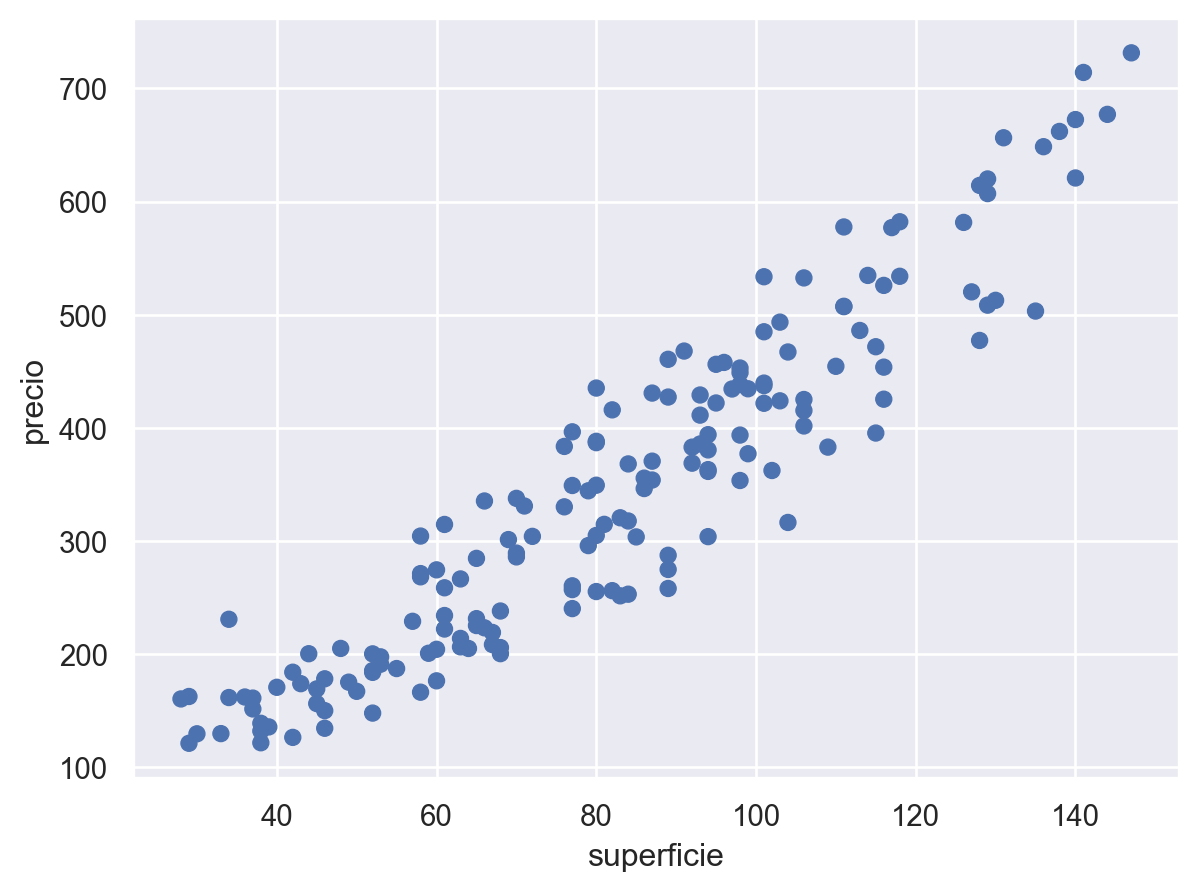

In [5]:
(
    so.Plot(datos, x = "superficie", y = "precio")
    .add (so.Dot())
 )

b) Realizar un gráfico de la regresión lineal entre ambas variables. El gráfico debe titularse
 “Datos inmobiliarios” y la recta de Regresión Lineal debe tener una leyenda que diga
 “Regresión”.

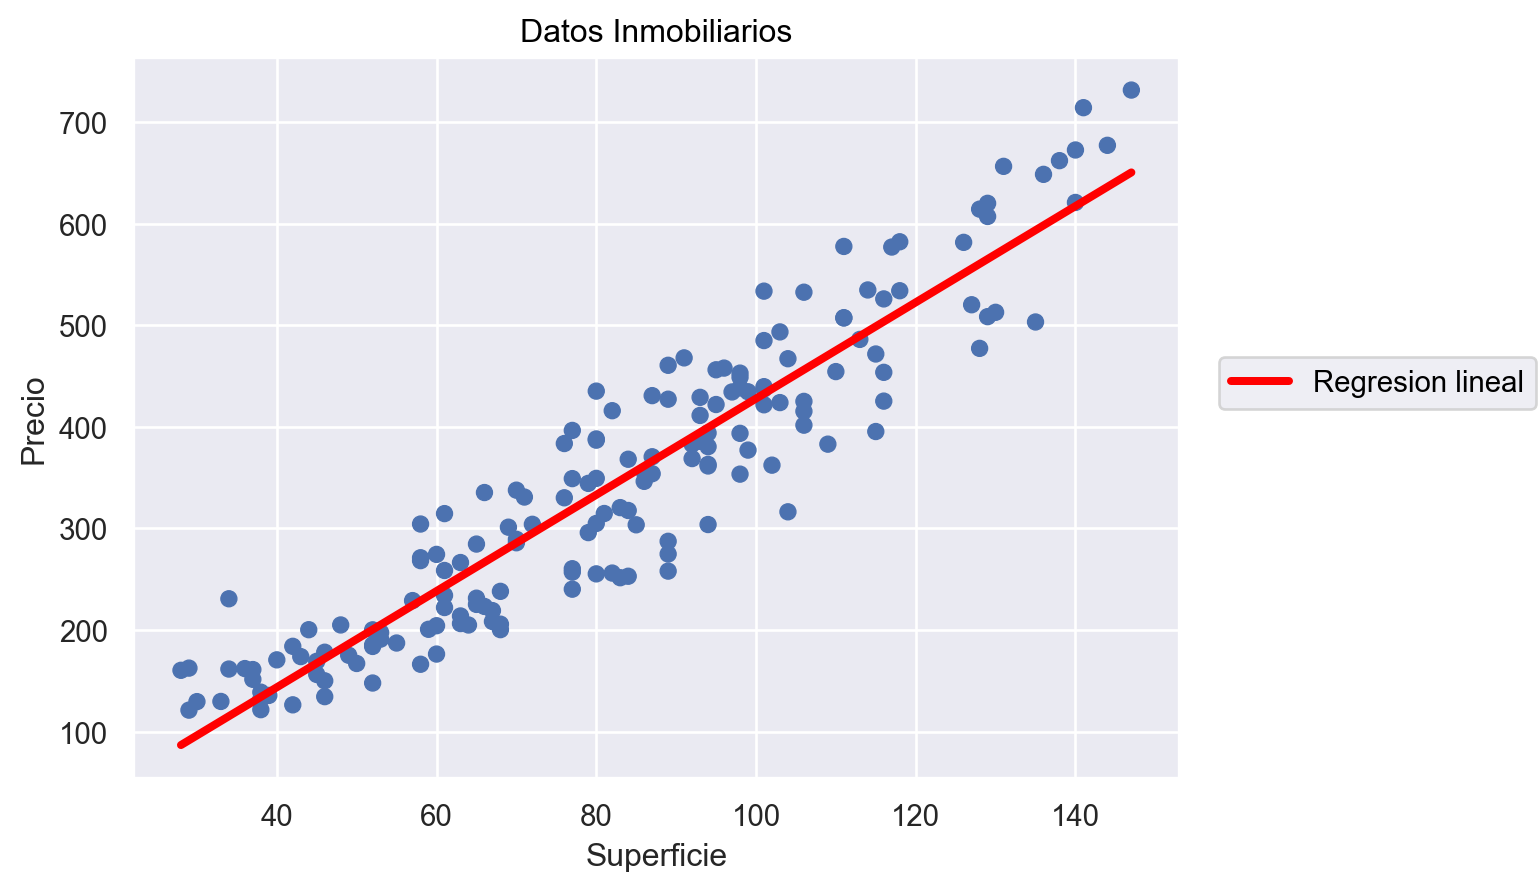

In [6]:
(
    so.Plot(data=datos, x='superficie', y='precio')
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label='Regresion lineal')    # Agregamos una etiqueta para la leyenda del grafico
    .label(title='Datos Inmobiliarios', x='Superficie', y='Precio')    # Agregamos la leyenda, un titulo y le cambiamos el nombre a los ejes
)

c) Calcular los coeficientes de la recta que mejor ajusta a los datos. Según el modelo, ¿qué
 podríamos interpretar sobre el costo del metro cuadrado en la ciudad?

In [13]:
modelo = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal
modelo.fit(datos[['superficie']], datos[['precio']])   # Realizamos el ajuste
beta_1 = modelo.coef_   # Con .coef_ recuperamos el valor de beta_1 (dentro de un array)
beta_0 = modelo.intercept_   # Con .intercept_ recuperamos el valor de beta_0 (dentro de  un array)

# Para obtener los valores de beta_1 y beta_0 como valores numericos
beta_1 = modelo.coef_[0][0]
beta_0 = modelo.intercept_[0]
print('Beta_1: ', beta_1)
print('Beta_0: ', beta_0)


Beta_1:  4.73579682230239
Beta_0:  -45.73153403092567


d) Para medir qué tan bien ajusta la recta a los datos, vamos a implementar dos funciones:
 una que calcule el error cuadrático medio (ECM) y otra que calcule el coeficiente de
 determinación R2.

In [48]:
#Para calcular ambas necesitamos los datos x, y y los coeficientes de la recta.
def ecm(x: np.array, y: np.array, beta_1: float, beta_0: float) -> float:

    xMedio = x.mean()
    yMedio = y.mean()

    beta_1 = np.sum ((x - xMedio) * (y - yMedio)) / np.sum ((x - xMedio)**2)

    beta_0 = yMedio - beta_1 * xMedio

    y_pred = beta_1 * x + beta_0 

    res = (np.sum ((y - y_pred)**2))/168

    return res



In [50]:
def r_cuad(x: np.array, y: np.array, beta_1: float, beta_0: float):
    
    y_pred = beta_0 + beta_1 * x
    yMedio = y.mean()

    r2 = np.sum ((y_pred - yMedio)**2) / np.sum ((y - yMedio)**2)

    return r2



2.e) Utilizando las funciones implementadas en el ítem anterior, calcular el ECM y el R2 del
 ajuste realizado en el item b). ¿En qué unidades está cada medida? ¿Cómo podemos
 interpretarlas?

In [52]:
ecm (datos['superficie'], datos['precio'], 4.73579682230239, -45.73153403092567)


2646.5902995753186

In [53]:
r_cuad (datos['superficie'], datos['precio'], 4.73579682230239, -45.73153403092567)

0.8762114698357931

2.f) Comparar los resultados obtenidos en el ítem anterior con los proporcionados por r2_score
 y mean_squared_error de scikit-learn

In [15]:
y_pred = beta_1 * datos['superficie'] + beta_0
mean_squared_error(datos[['precio']], y_pred)

2630.9300019446955

In [16]:
y_pred = beta_1 * datos['superficie'] + beta_0

r2_score (datos[['precio']], y_pred)

0.8762114698357936

2.g) Mediante la confección de un boxplot, decidir en cuál de las zonas hay mayor variabilidad
 de precios. ¿Hay algún outlier?

<Axes: xlabel='zona', ylabel='precio'>

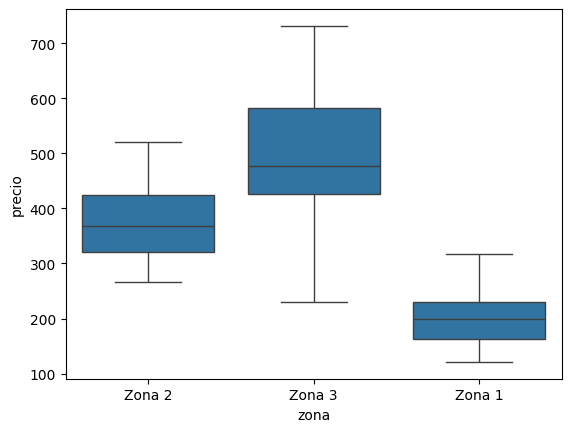

In [68]:
sns.boxplot(datos, x="zona", y="precio")

In [69]:
def variabilidad (y: np.array, beta_1: float, beta_0: float) -> float:

    yMedio = y.mean()

    res = np.sum ((y - yMedio)**2)

    return res

variabilidad (datos['precio'],)

2.h) Para cada una de las zonas de la ciudad, calcular los coeficientes, el ECM y R2 de la recta
 que mejor aproxima a los datos.

ZONA 1

In [72]:
modelo = linear_model.LinearRegression()   
modelo.fit(datos[['superficie']], datos[['precio']])   
beta_1 = modelo.coef_   
beta_0 = modelo.intercept_   

# Para obtener los valores de beta_1 y beta_0 como valores numericos
beta_1 = modelo.coef_[0][0]
beta_0 = modelo.intercept_[0]
print('Beta_1: ', beta_1)
print('Beta_0: ', beta_0)

Beta_1:  4.73579682230239
Beta_0:  -45.73153403092567


In [74]:
datos.head()

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3


In [ ]:
ecm (datos[datos['zona']=='Zona 1'],datos['precio'],4.73579682230239,-45.73153403092567)

ACA ME RENDÍ, PREGUNTAR A FEDE

3) En el archivo bitcoin.csv se encuentran datos de cotizacion de Bitcoin desde el 17/09/2014
 hasta el 19/02/2022

In [77]:
btc = pd.read_csv('/Users/Usuario/Documents/EXACTAS/DATOS/2do Año/Labo de Datos/LDD/P4 LDD/Data/bitcoin.csv')
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


 Nos interesa analizar la evolución del precio de cierre (Close) en periodo comprendido entre el
 01/01/2021 y el 01/07/2021:

In [78]:
 # Nos aseguramos que pandas interprete la fecha correctamente
btc['Date'] = pd.to_datetime(btc['Date'], format='%Y-%m-%d')

In [80]:
 # Filtramos el dataset en el periodo de interes
btc_2021 = btc[(btc['Date']>"2021-01-01") & (btc['Date']<"2021-07-01")]
display (btc_2021)

,Date,Open,High,Low,Close,Adj Close,Volume
2299,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2300,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2301,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344
2302,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782
2303,2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811
...,...,...,...,...,...,...,...
2474,2021-06-26,31594.664063,32637.587891,30184.501953,32186.277344,32186.277344,38585385521
2475,2021-06-27,32287.523438,34656.128906,32071.757813,34649.644531,34649.644531,35511640894
2476,2021-06-28,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,33892523752
2477,2021-06-29,34475.558594,36542.109375,34252.484375,35867.777344,35867.777344,37901460044


 Visualizar el ajuste lineal para los datos del dataframe btc_2021. En este caso, ¿resulta más
 conveniente un scatterplot o un gráfico de lineas para los datos?

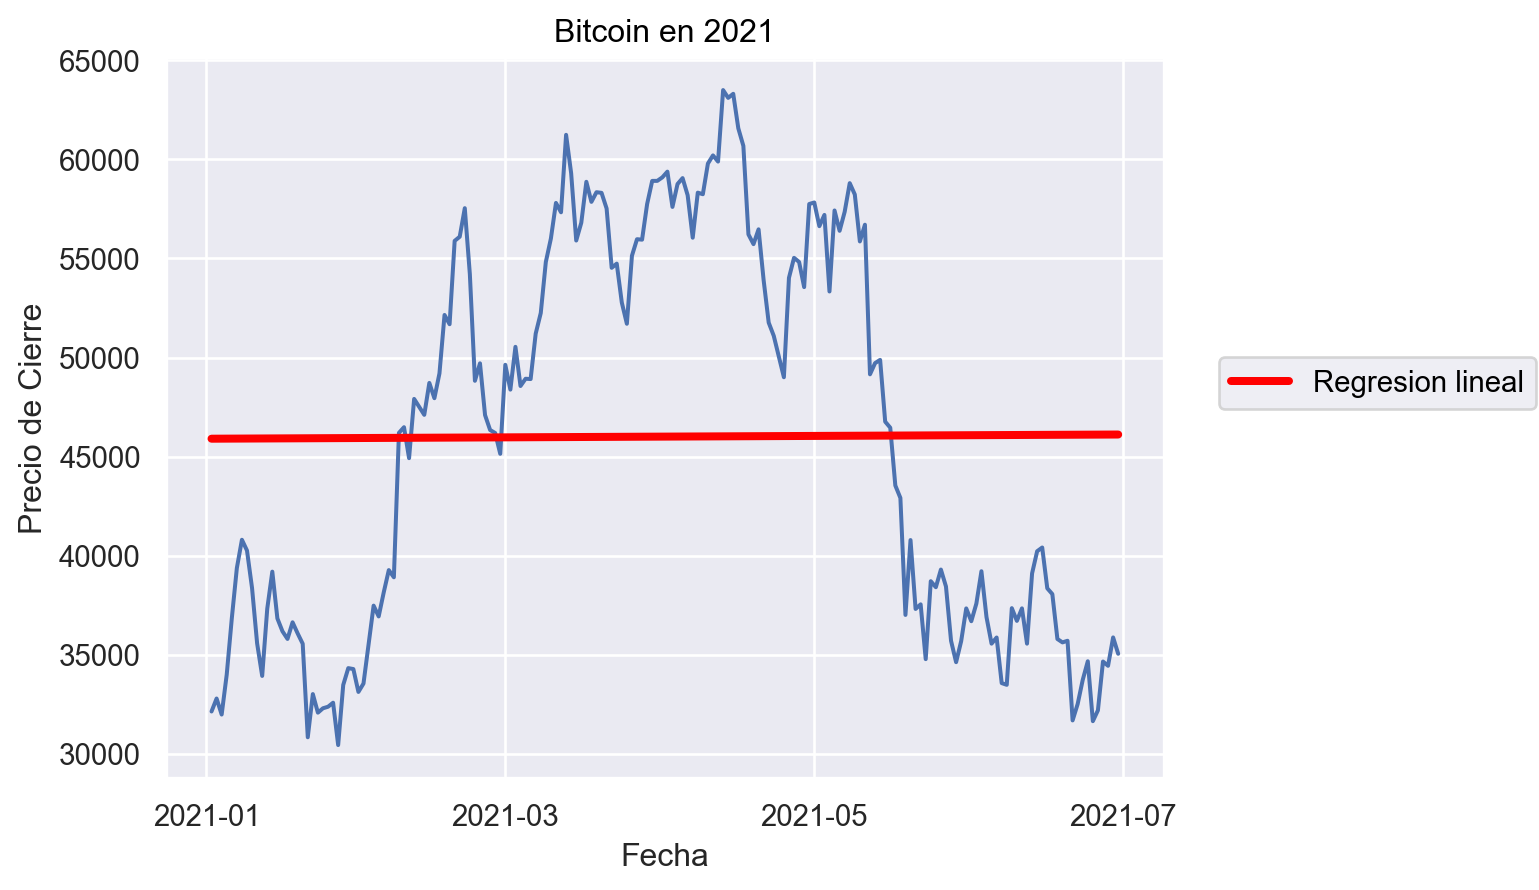

In [86]:
( so.Plot(data=btc_2021, x='Date', y='Close')
    .add(so.Line())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label='Regresion lineal')
    .label(title='Bitcoin en 2021', x='Fecha', y='Precio de Cierre')    
)

¿Te resultaría útil utilizar esta
 recta para predecir el valor de BTC o para describir el cambio de su valor en este periodo?

La verdad que no

 4. Utilizando el dataset tips de seaborn, realizar la Regresión Lineal donde la variable X es total_bill menos el promedio de total_bill
 y la variable Y es tip.

In [87]:
datos = sns.load_dataset('tips')
datos.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


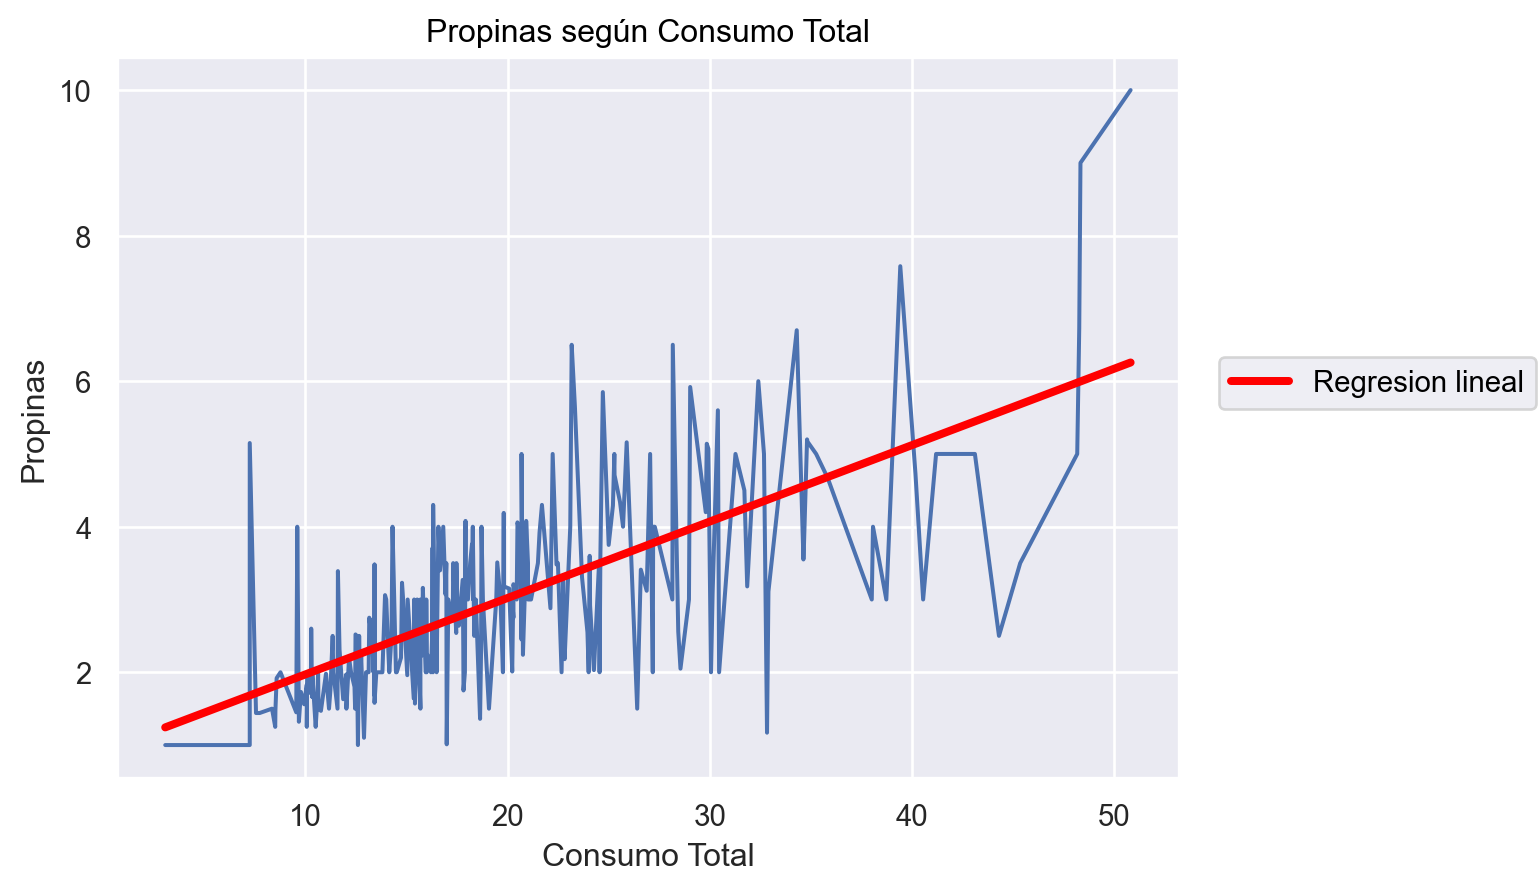

In [88]:
( so.Plot(data=datos, x='total_bill', y='tip')
    .add(so.Line())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label='Regresion lineal')
    .label(title='Propinas según Consumo Total', x='Consumo Total', y='Propinas')    
)

Responder las siguientes preguntas:
(a) ¿Qué interpretación se le puede dar a Beta 0? Pista: calcular el promedio de las propinas.

Respuesta: Beta 0 (ordenada al origen) debería estar en el 0 y el 1

In [92]:
y = datos['tip']
y.mean()


2.99827868852459

In [93]:
coefs_rl(datos['total_bill'],datos['tip'])

(0.9202696135546726, 0.1050245173843534)

Y tuve razón: Beta 0 es 0.92 (...)

 (b) ¿Cambia el valor de Beta 1 respecto a la Regresión Lineal de total_bill vs. tip?

 Respuesta: No (?)

CAMBIO DE EJ

5. En este ejercicio utilizaremos el dataset healthexp de seaborn, donde se recopila cada año
 (Year) lo que cada país (Country) invierte en salud por habitante (Spending_USD) y su
 expectativa de vida (Life_Expectancy).

 Nos enfocaremos en los datos de Japón, nuestra variable predictora será Spending_USD y la
 dependiente será Life_Expectancy.

 (a) Visualizar en un mismo gráfico los datos y los polinomios de grado 1, de grado 2 y de grado
 3 que mejor ajustan a los datos. Añadir etiquetas que para facilitar la interpretación del
 gráfico.

In [98]:
healthExp = pd.read_csv('/Users/Usuario/Documents/EXACTAS/DATOS/2do Año/Labo de Datos/LDD/P4 LDD/Data/healthexp.csv')
healthExp.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [101]:
datos = healthExp[healthExp['Country']== 'Japan']
datos.head()

,Year,Country,Spending_USD,Life_Expectancy
3,1970,Japan,150.437,72.0
8,1971,Japan,163.854,72.9
11,1972,Japan,185.390,73.2
14,1973,Japan,205.778,73.4
17,1974,Japan,242.018,73.7


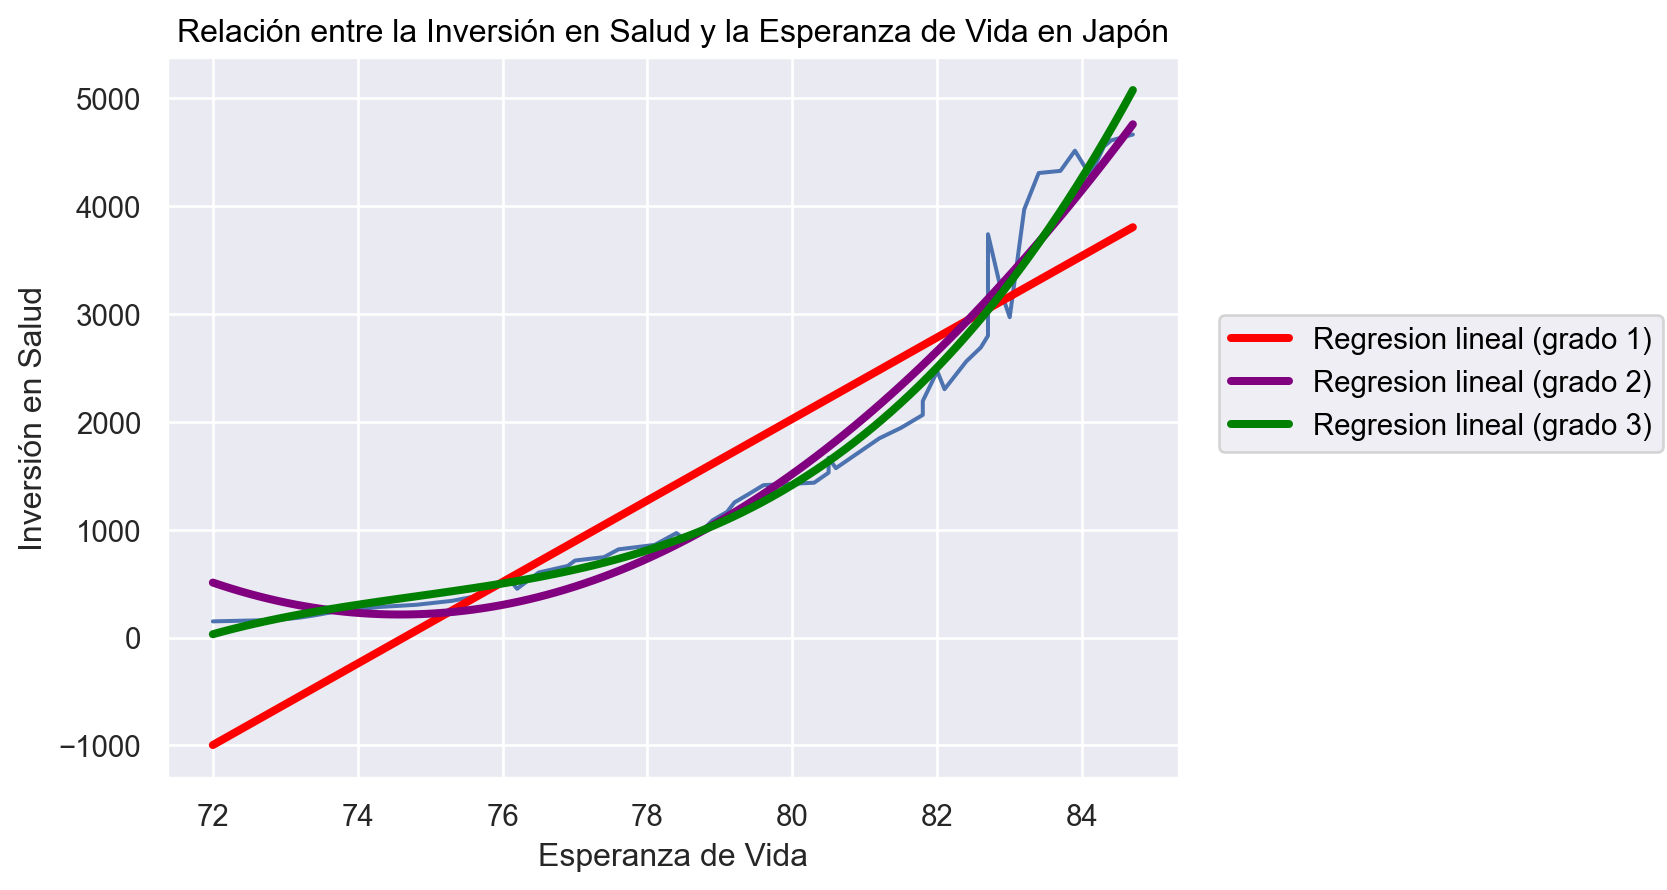

In [108]:
(so.Plot(
    datos, x= 'Life_Expectancy', y= 'Spending_USD')
    .add(so.Line())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label='Regresion lineal (grado 1)')
    .add(so.Line(color='purple', linewidth=3), so.PolyFit(2), label='Regresion lineal (grado 2)')
    .add(so.Line(color='green', linewidth=3), so.PolyFit(3), label='Regresion lineal (grado 3)')
    .label(title='Relación entre la Inversión en Salud y la Esperanza de Vida en Japón', x='Esperanza de Vida', y='Inversión en Salud') 
)

 (b) En base al gráfico obtenido en el ítem anterior, elegir el grado que considerás que mejor
 ajusta a los datos. Utilizando scikit-learn, calcular los coeficientes de ese polinomio.

Elijo el grado 3

PREGUNTAR A FEDE

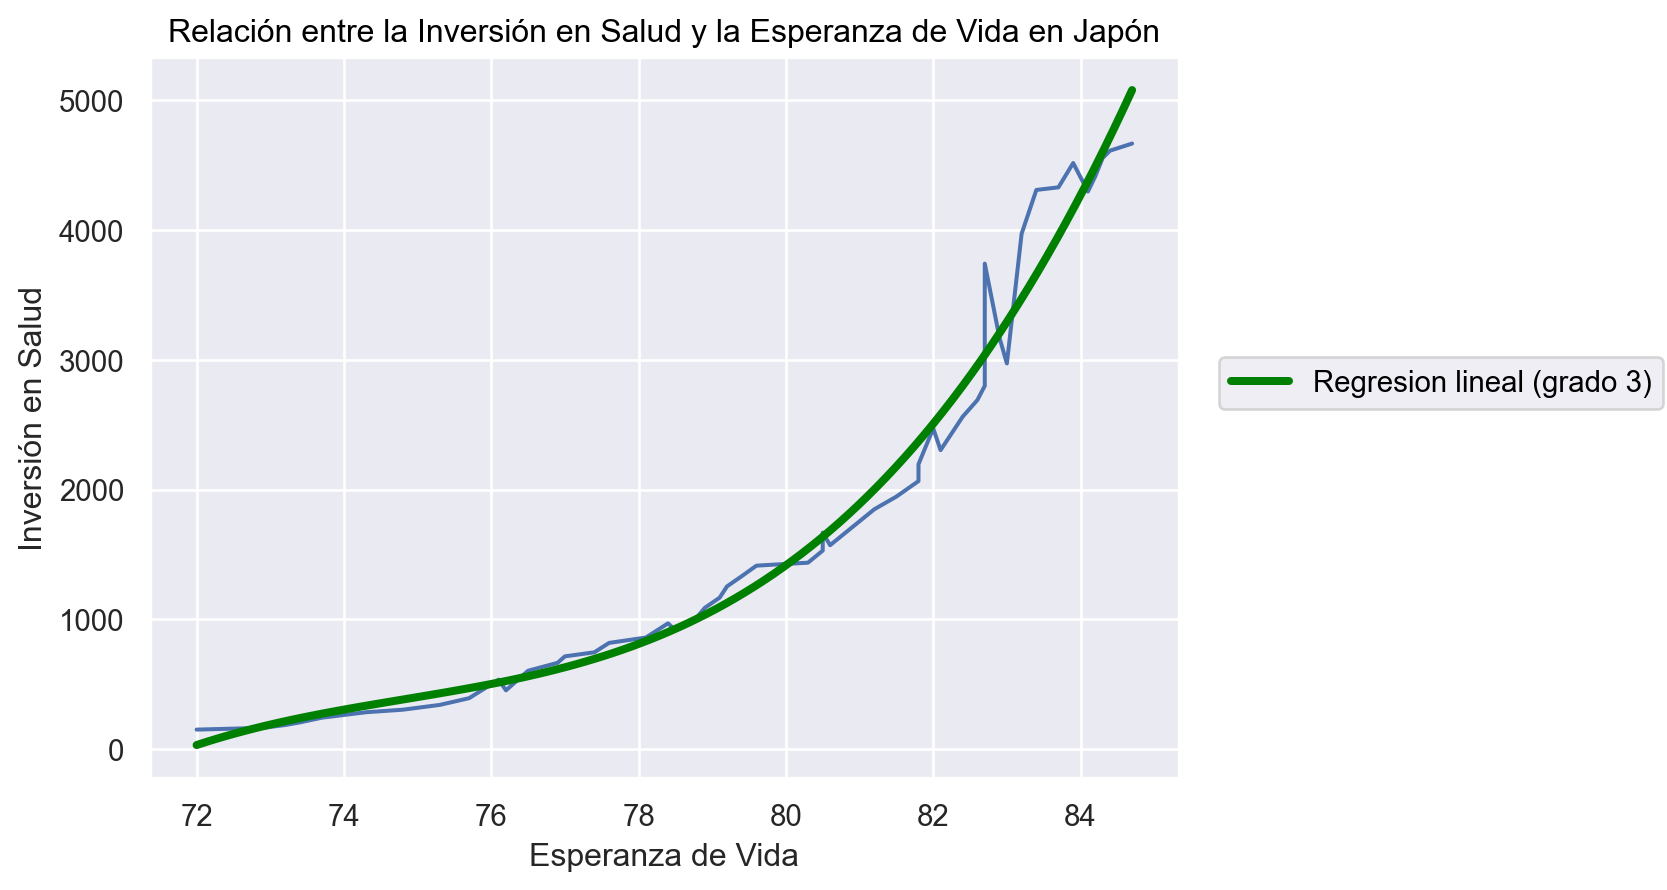

In [110]:
(so.Plot(
    datos, x= 'Life_Expectancy', y= 'Spending_USD')
    .add(so.Line())
    .add(so.Line(color='green', linewidth=3), so.PolyFit(3), label='Regresion lineal (grado 3)')
    .label(title='Relación entre la Inversión en Salud y la Esperanza de Vida en Japón', x='Esperanza de Vida', y='Inversión en Salud') 
)

(c) Calcular el R2 y el ECM.

(d) Según el polinomio obtenido en el ítem anterior, estimar cuál sería la expectativa de vida
 de los habitantes de Japón si el país invirtiera U$D 5000.

(e) Visualizar el polinomio de grado 10 que mejor ajusta a los datos. ¿Se aprecia una mejora?
 ¿Resulta conveniente ajustar con un polinomio de grado 50?

 Respuesta: No, es demasiado ajustado. No, ni siquiera se puede graficar.

c:\Python38\lib\site-packages\seaborn\_core\groupby.py:113: RankWarning: Polyfit may be poorly conditioned
  return self._reorder_columns(func(data, *args, **kwargs), data)


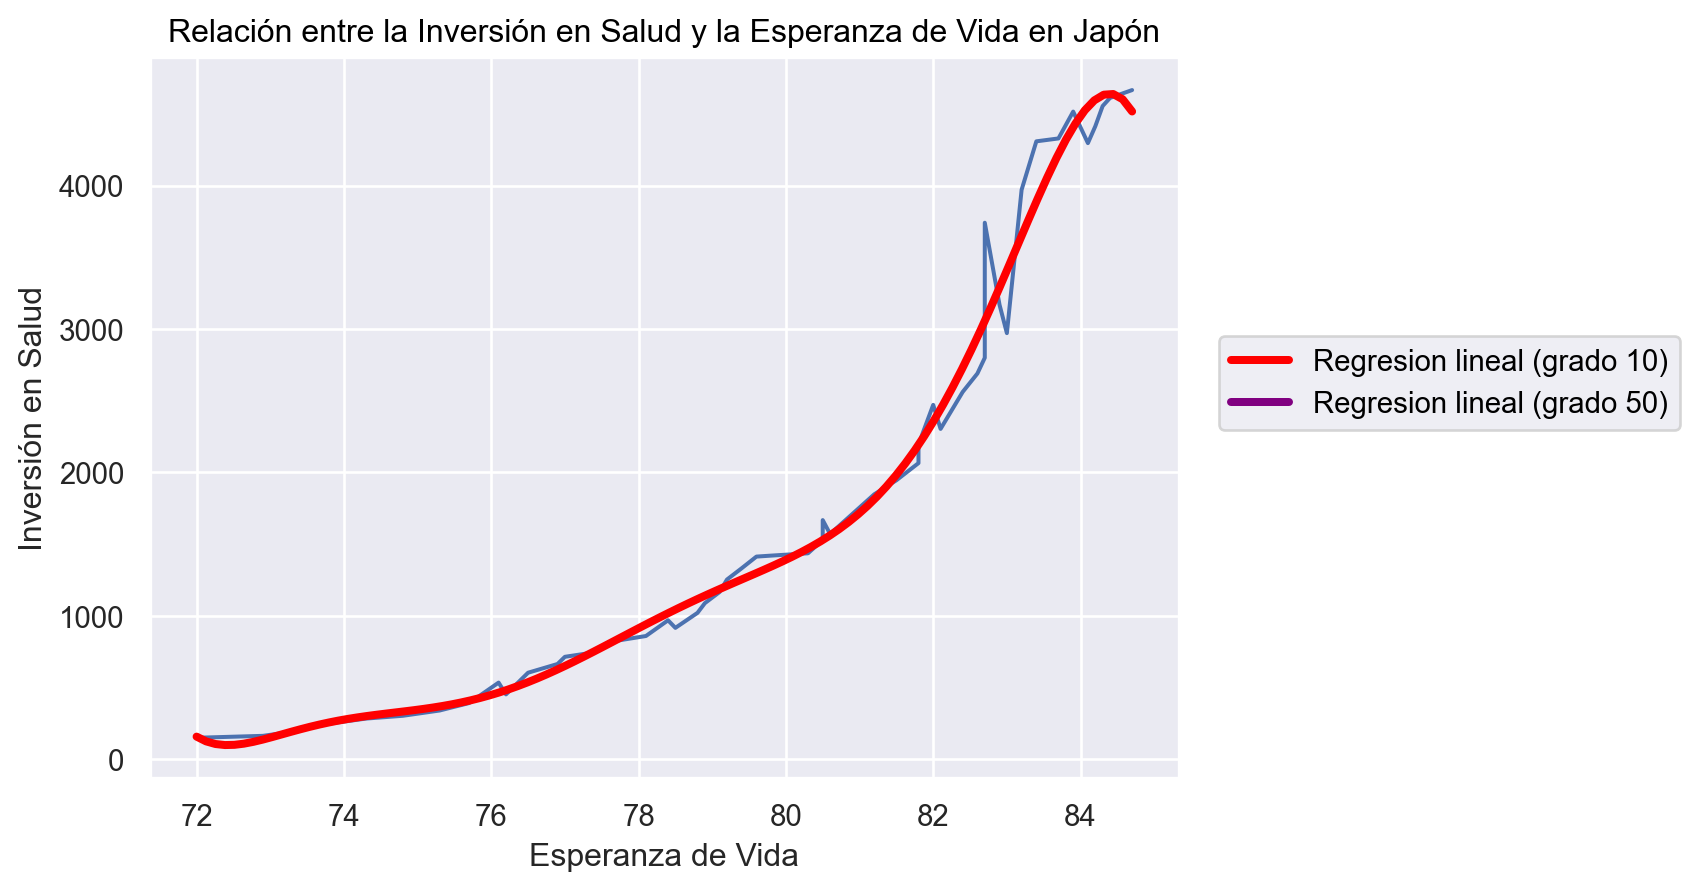

In [109]:
(so.Plot(
    datos, x= 'Life_Expectancy', y= 'Spending_USD')
    .add(so.Line())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(10), label='Regresion lineal (grado 10)')
    .add(so.Line(color='purple', linewidth=3), so.PolyFit(50), label='Regresion lineal (grado 50)')
    .label(title='Relación entre la Inversión en Salud y la Esperanza de Vida en Japón', x='Esperanza de Vida', y='Inversión en Salud') 
)